# Online version of K-means

## Data acquisition

In [88]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import os

In [89]:
# Génération de nouvelles données avec 2 classes
X, _ = make_blobs(n_samples=100, centers=2, random_state=42)

DATA_PATH = 'data'
os.makedirs(DATA_PATH, exist_ok=True)

# Sauvegarde des données dans un fichier CSV
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df.to_csv(f'{DATA_PATH}/data.csv', index=False)

## Sequential K-means

In [90]:
# Fonction générateur pour charger les données par batch
def data_generator(file_path, batch_size):
    for chunk in pd.read_csv(file_path, chunksize=batch_size):
        yield chunk.values

# Initialisation aléatoire des centres
def initialize_centers(data, k):
    return data[np.random.choice(len(data), k, replace=False)]

# Mise à jour des centres, des effectifs et des labels pour un lot de données
def update_centers(data, centers, counts):
    """ 
    """
    mu = np.copy(centers)
    n = np.copy(counts)
    labels = np.zeros(len(data), dtype=int)
    
    for i, x_i in enumerate(data):
        j = np.argmin(np.linalg.norm(mu - x_i, axis=1))
        eta = 1 / (n[j] + 1)
        mu[j] += eta * (x_i - mu[j])
        n[j] += 1
        labels[i] = j
    return mu, n, labels


## Experiments

In [91]:
# ################
# CONFIGURATION
##################

# Exécution de l'algorithme K-means sur les données par batch
file_path = f'{DATA_PATH}/data.csv'
k = 2
batch_size = 20
max_iter = 100


In [92]:
# centers = None
# counts = None
# classes = None

# ################
# RUNNING ALGORITHM
##################

counts = np.zeros(k)
data_gen = data_generator(file_path, batch_size)
centers = initialize_centers(X, k)
classes = np.array([])

for _ in range(max_iter):
    # reset cluster size
    counts = np.zeros(k)
    centers = initialize_centers(X, k)
    data_gen = data_generator(file_path, batch_size) # 
    labels_lst = []  # stocker les labels du batch
    for batch in data_gen:
        centers, counts, batch_labels = update_centers(batch, centers, counts)
        labels_lst.append(batch_labels)
    
    # Concaténation des labels de tous les batches   
    classes = np.concatenate(labels_lst)

In [93]:
centers, counts, classes

(array([[-2.70292301,  8.89011496],
        [ 4.60840443,  2.16998192]]),
 array([50., 50.]),
 array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

In [94]:
# ################
# SAVING RESULTS
##################

RESULTS_PATH = 'experiments/online'


os.makedirs(RESULTS_PATH, exist_ok=True)
# Sauvegarde des résultats (centres, effectifs et labels) dans un fichier CSV
results_df = pd.DataFrame({'Center_X': centers[:, 0], 'Center_Y': centers[:, 1], 'Counts': counts})
results_df.to_csv(f'{RESULTS_PATH}/kmeans_report.csv', index=False, header=True)

data_clusters_df = pd.concat([df, pd.DataFrame(classes, columns=['cluster'])], axis=1)
data_clusters_df.to_csv(f'{RESULTS_PATH}/data_clusters.csv', index=False, header=True)

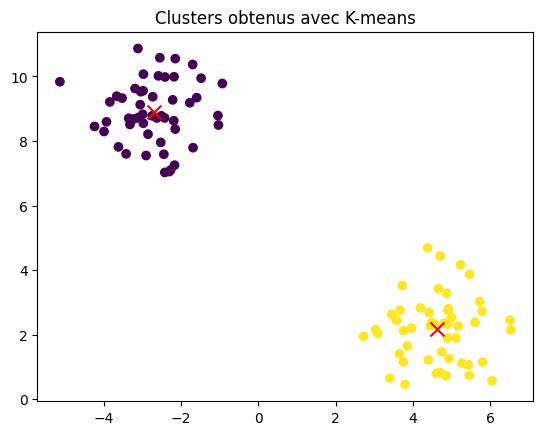

In [95]:
# ################
# VISUALISATIONS
##################

import matplotlib.pyplot as plt


# Visualisation des clusters
plt.scatter(X[:, 0], X[:, 1], c=classes, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
plt.title('Clusters obtenus avec K-means')
plt.show()
